<div style="font-family: Arial, Helvetica, sans-serif;">
    <div style="display: flex;padding-top: 20px">
        <div><strong>Course:</strong> Programming for Data Science</div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Class:</strong> 22KHDL</div>
        <div></div>
    </div>
    <div style="display: flex;padding-top: 20px`>
        <div style="padding-right: 10px;"><strong>Group:</strong> 5</div>
    </div>
    <div>
        <div style="display: flex;padding-top: 20px">
            <div style="padding-right: 10px;"><strong>Members:</strong></div>
            <div></div>
        </div>
        <table style="font-size: 15px; display:flex;padding-top: 20px">
            <tr>
                <th>No.</th>
                <th>Student ID</th>
                <th>Name</th>
            </tr>
            <tr>
                <td>1</td>
                <td> 22127008 </td>
                <td style="text-align:left;">Đặng Châu Anh</td>
            </tr>
            <tr>
                <td>2</td>
                <td>22127014</td>
                <td style="text-align:left;">Nguyễn Kim Anh</td>
            </tr>
            <tr>
                <td>3</td>
                <td> 22127170 </td>
                <td style="text-align:left;">Trần Dịu Huyền</td>
            </tr>
        </table>
    </div>
    <div style="font-size: 25px ;font-weight: 800; text-align: center;padding-top: 20px;">FINAL PROJECT</div>
    <div style="font-size: 20px ;font-weight: 800; text-align: center;padding-top: 20px;">COVID - 19 ANALYSIS - DATA ANALYSIS</div>
</div>

# **Table of Contents**

1. [**Import necessary packages**](#import)

2. [**Load data**](#load)

3. [**Visualization**](#visualization)

4. [**Analysis**](#analysis)
    - [Question 1](#q1)
    - [Question 2](#q2)
    - [Question 3](#q3)

5. [**References**](#references)

# **Data Analysis**
<a id="import"></a>
## **Import necessary packages**

In [1]:
# Install geopandas to plot geographical data
%pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import geopandas as gpd

<a id="load"></a>
## **Load data**
Read cleaned data from last section
- Read the data from the file `covid_19.csv` and display the 5 rows of the data.

In [3]:
# covid_19.csv
covid_19_df = pd.read_csv("./cleaned_data/covid_19.csv")
covid_19_df.sample(5)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
44451,Colombia,4.570900,-74.29730,2020-07-10,140776,4925,56272,79579,Americas
42643,Estonia,58.595300,25.01360,2020-07-03,1991,69,1859,63,Europe
48745,Spain,40.463667,-3.74922,2020-07-26,272421,28432,150376,93613,Europe
37703,Ghana,7.946500,-1.02320,2020-06-14,11964,54,4258,7652,Africa
25212,Mexico,23.634500,-102.55280,2020-04-27,15529,1434,9086,5009,Americas


Read cleaned data from last section
- Read the data from the file `lastest.csv` and display the 5 rows of the data.

In [4]:
# lastest.csv
country_df = pd.read_csv("./cleaned_data/latest.csv")
country_df.sample(5)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
99,Libya,Africa,6880353.0,4879,107.0,652.0,4120.0,0.0,709.0,16.0,59699.0,8677.0,EasternMediterranean
89,Finland,Europe,5541604.0,7532,331.0,6980.0,221.0,0.0,1359.0,60.0,389500.0,70287.0,Europe
107,Hong Kong,Asia,7503041.0,3850,46.0,2458.0,1346.0,39.0,513.0,6.0,692430.0,92287.0,WesternPacific
166,Mauritius,Africa,1271985.0,344,10.0,334.0,0.0,0.0,270.0,8.0,205285.0,161389.0,Africa
207,Vatican City,Europe,801.0,12,0.0,12.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe


- Read the data from the file `total_per_day.csv` and display the 5 rows of the data.

In [5]:
# total_per_day.csv
day_df = pd.read_csv("./cleaned_data/total_per_day.csv")
day_df.sample(5)

,Date,Confirmed,Deaths,Recovered,Active
186,2020-07-26,16251796,648621,9293464,6309711
67,2020-03-29,730300,35470,146261,548569
132,2020-06-02,6401536,381497,2743083,3276956
39,2020-03-01,87690,2990,41208,43492
95,2020-04-26,2964146,210862,825969,1927315


<a id="visualization"></a>
## **Visualization**

### **Total number of Confirmed, Deaths, Recovered and Active cases around the world** 
This analysis provides the total number of confirmed, deaths, recovered, and active cases globally. The data is aggregated from the `worldometer_data` dataset, and the results are visualized using a bar chart.

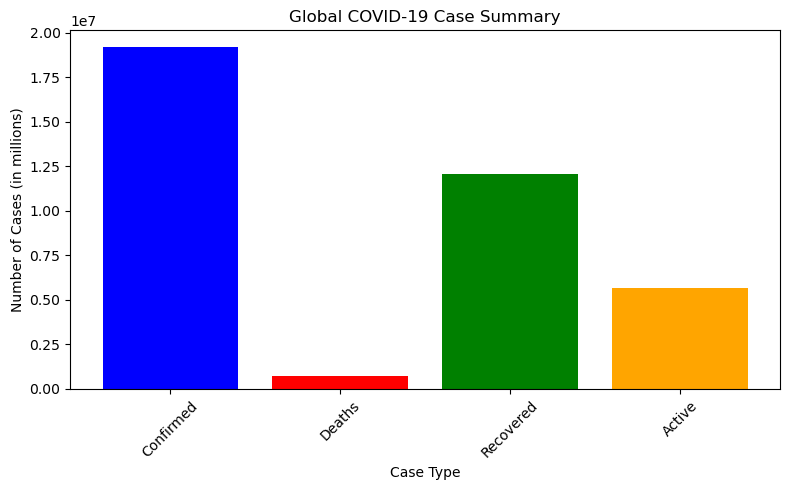

{'Confirmed': 19169166,
 'Deaths': 713007.0,
 'Recovered': 12070191.0,
 'Active': 5671187.0}

In [6]:
total_confirmed = country_df['TotalCases'].sum()
total_deaths = country_df['TotalDeaths'].sum()
total_recovered = country_df['TotalRecovered'].sum()
total_active = country_df['ActiveCases'].sum()

# Save all total data
totals = {
    "Confirmed": total_confirmed,
    "Deaths": total_deaths,
    "Recovered": total_recovered,
    "Active": total_active
}

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(totals.keys(), totals.values(), color=['blue', 'red', 'green', 'orange'])
plt.title("Global COVID-19 Case Summary")
plt.ylabel("Number of Cases (in millions)")
plt.xlabel("Case Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

totals

### **Correlation between population, death cases, recovered case, active case and critical, serious case**
To analyze the correlation between population, death cases, recovered case, active case and critical, serious case, we will calculate the correlation matrix and plot it using heatmap. This analysis offers insights into the interdependencies among these variables, helping identify any significant patterns or strong relationships.

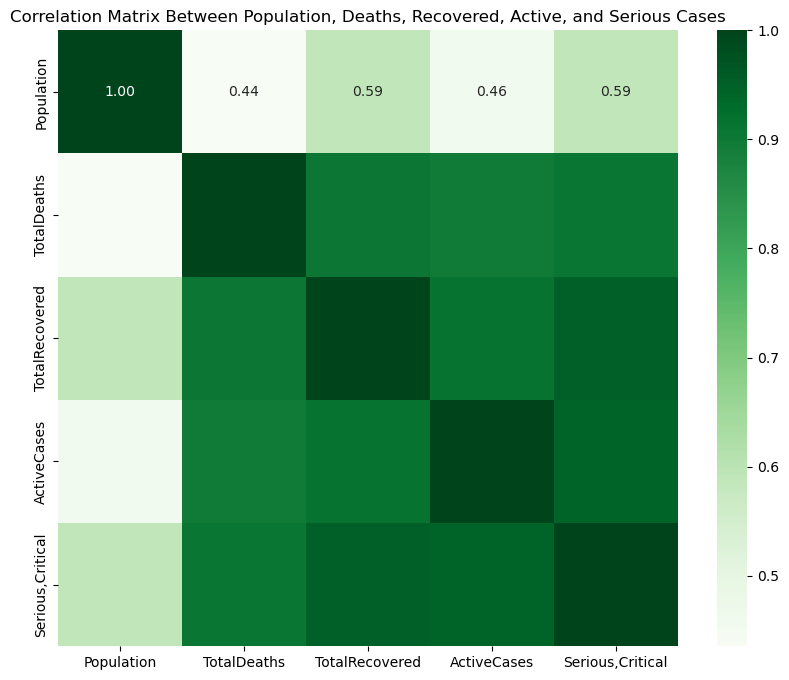

,Population,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical"
Population,1.000000,0.435269,0.589550,0.458732,0.588562
TotalDeaths,0.435269,1.000000,0.903282,0.897461,0.909095
TotalRecovered,0.589550,0.903282,1.000000,0.914581,0.949477
ActiveCases,0.458732,0.897461,0.914581,1.000000,0.944925
"Serious,Critical",0.588562,0.909095,0.949477,0.944925,1.000000


In [7]:
# Select the relevant columns for correlation
used_col = ['Population', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical']
correlation_data = country_df[used_col]
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title("Correlation Matrix Between Population, Deaths, Recovered, Active, and Serious Cases")
plt.show()

correlation_matrix


### **Top 10 countries with the lowest number of deaths/recovered/actived cases**
First, we will analyze the countries with the lowest number of total deaths. By sorting the dataset in ascending order by the `TotalDeaths` column, we extract the top 10 countries. This allows us to observe the regions that have managed to control fatalities effectively.

In [8]:
top_10_lowest_deaths = country_df.sort_values(by="TotalDeaths", ascending=True).head(10)
top_10_lowest_deaths

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
184,Seychelles,Africa,98408.0,126,0.0,124.0,2.0,0.0,1280.0,0.0,0.0,0.0,Africa
174,Cambodia,Asia,16741375.0,243,0.0,210.0,33.0,1.0,15.0,0.0,67807.0,4050.0,WesternPacific
172,Faeroe Islands,Europe,48882.0,266,0.0,192.0,74.0,1.0,5442.0,0.0,43045.0,880590.0,No-WHO Region
190,French Polynesia,Australia/Oceania,281072.0,64,0.0,62.0,2.0,0.0,228.0,0.0,5849.0,20810.0,No-WHO Region
191,St. Vincent Grenadines,North America,110976.0,56,0.0,46.0,10.0,0.0,505.0,0.0,2447.0,22050.0,No-WHO Region
207,Vatican City,Europe,801.0,12,0.0,12.0,0.0,0.0,14981.0,0.0,0.0,0.0,Europe
193,Macao,Asia,650193.0,46,0.0,46.0,0.0,0.0,71.0,0.0,4071.0,6261.0,No-WHO Region
169,Eritrea,Africa,3551175.0,282,0.0,225.0,57.0,0.0,79.0,0.0,0.0,0.0,Africa
168,Mongolia,Asia,3283344.0,293,0.0,260.0,33.0,1.0,89.0,0.0,38334.0,11675.0,WesternPacific
186,Bhutan,Asia,772443.0,105,0.0,93.0,12.0,0.0,136.0,0.0,54589.0,70671.0,South-EastAsia


The result indicates that the minimum of `TotalDeaths` is 0 case.

Next, we identify the countries with the lowest number of total recovered cases. Sorting the dataset in ascending order by the `TotalRecovered` column gives us insights into regions with minimal recovery data. These could represent countries that were less affected or regions with reporting inconsistencies.

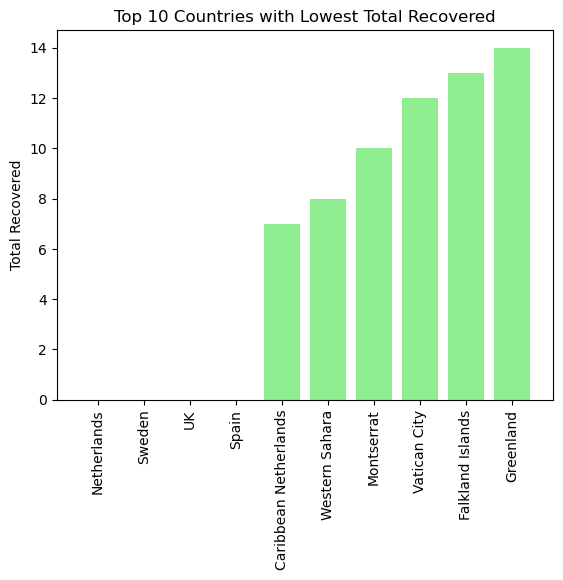

In [9]:
top_10_lowest_recovered = country_df.sort_values(by="TotalRecovered", ascending=True).head(10)

plt.bar(top_10_lowest_recovered["Country/Region"], top_10_lowest_recovered["TotalRecovered"], color='lightgreen')
plt.title("Top 10 Countries with Lowest Total Recovered")
plt.ylabel("Total Recovered")
plt.xticks(rotation=90);

Finally, we analyze the countries with the lowest number of active cases. By sorting the `ActiveCases` column in ascending order, we observe regions that currently have the least number of active infections, indicating successful containment or minimal spread.

In [10]:
top_10_lowest_active_cases = country_df.sort_values(by="ActiveCases", ascending=True).head(10)
top_10_lowest_active_cases

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
40,Netherlands,Europe,17138756.0,56982,6153.0,0.0,0.0,37.0,3325.0,359.0,1079860.0,63007.0,Europe
206,Falkland Islands,South America,3489.0,13,0.0,13.0,0.0,0.0,3726.0,0.0,1816.0,520493.0,No-WHO Region
166,Mauritius,Africa,1271985.0,344,10.0,334.0,0.0,0.0,270.0,8.0,205285.0,161389.0,Africa
176,Cayman Islands,North America,65798.0,203,1.0,202.0,0.0,0.0,3085.0,15.0,31108.0,472780.0,No-WHO Region
203,Greenland,North America,56780.0,14,0.0,14.0,0.0,0.0,247.0,0.0,5977.0,105266.0,Europe
157,San Marino,Europe,33938.0,699,42.0,657.0,0.0,0.0,20596.0,1238.0,6068.0,178797.0,Europe
201,Dominica,North America,72004.0,18,0.0,18.0,0.0,0.0,250.0,0.0,1005.0,13958.0,Americas
29,Sweden,Europe,10105596.0,81967,5766.0,0.0,0.0,38.0,8111.0,571.0,863315.0,85429.0,Europe
199,New Caledonia,Australia/Oceania,285769.0,22,0.0,22.0,0.0,0.0,77.0,0.0,11099.0,38839.0,No-WHO Region
9,Spain,Europe,46756648.0,354530,28500.0,0.0,0.0,617.0,7582.0,610.0,7064329.0,151087.0,Europe


From the above bar charts and DataFrames (not necessary to plot cause the result of that feature is 0), it is clear that:

- Countries with the `lowest total deaths` (e.g., *Macao*, *Grenada*, *Saint Lucia*, and *New Caledonia*) all report **0** deaths, indicating either very effective pandemic control or minimal exposure to the virus.

- The `lowest total recovered` cases are observed in countries like *Greenland* (**14**), *Falkland Islands* (**13**), and *Vatican City* (**12**). These numbers suggest very few total infections or incomplete reporting of recoveries in these regions.

- Countries with the `lowest active cases` (e.g., *Mauritius*, *Falkland Islands*, *Vatican City*, and *Macao*) all have **0** active cases, reflecting complete recovery of infected individuals or very limited ongoing spread.

- Overall, these charts highlight that smaller, less-populated, or geographically isolated regions tended to experience minimal impact from the pandemic, with very low fatalities and active cases.

### **Top 10 countries with the highest number of deaths/recovered/actived cases** 
First, we analyze the countries with the highest total deaths. By sorting the dataset in descending order by the `TotalDeaths` column, we identify the 10 countries most impacted in terms of fatalities. This highlights the regions where the pandemic caused the greatest loss of life.

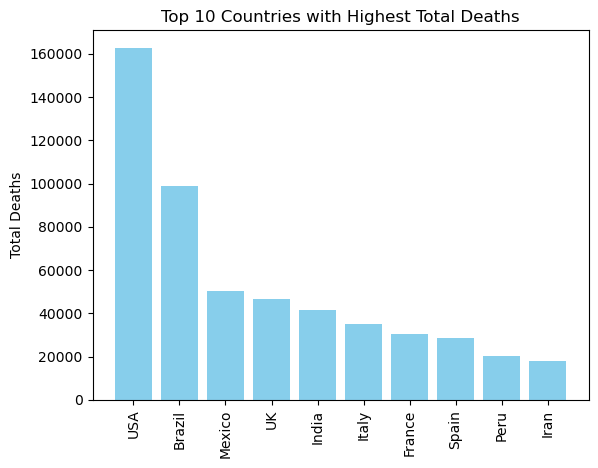

In [11]:
top_10_highest_deaths = country_df.sort_values(by="TotalDeaths", ascending=False).head(10)

plt.bar(top_10_highest_deaths["Country/Region"], top_10_highest_deaths["TotalDeaths"], color='skyblue')
plt.title("Top 10 Countries with Highest Total Deaths")
plt.ylabel("Total Deaths")
plt.xticks(rotation=90);

Next, we look at the countries with the highest total recovered cases. Sorting the dataset in descending order by the `TotalRecovered` column allows us to identify the regions where recovery efforts have been most successful. This indicates a large number of individuals who overcame the infection.

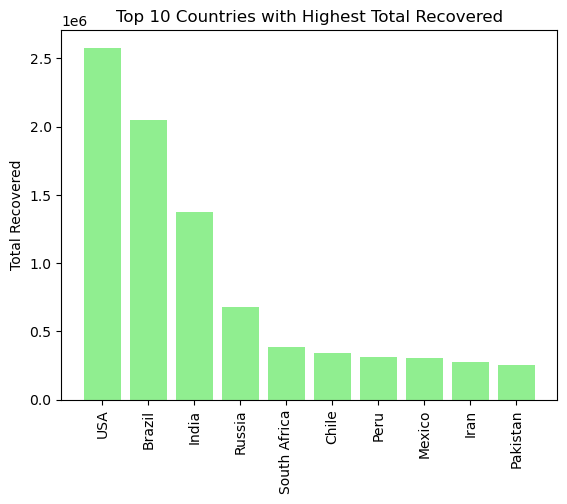

In [12]:
top_10_highest_recovered = country_df.sort_values(by="TotalRecovered", ascending=False).head(10)

plt.bar(top_10_highest_recovered["Country/Region"], top_10_highest_recovered["TotalRecovered"], color='lightgreen')
plt.title("Top 10 Countries with Highest Total Recovered")
plt.ylabel("Total Recovered")
plt.xticks(rotation=90);

Finally, we examine the countries with the highest active cases. Sorting the dataset in descending order by the `ActiveCases` column highlights the regions currently facing the largest ongoing burden of infections. These are areas where the pandemic remains a significant challenge.

,Country/Region,ActiveCases
0,USA,2292707.0
1,Brazil,771258.0
2,India,606387.0
3,Russia,180931.0
8,Colombia,153416.0
4,South Africa,141264.0
6,Peru,124648.0
17,Argentina,124092.0
5,Mexico,103325.0
14,Bangladesh,102521.0


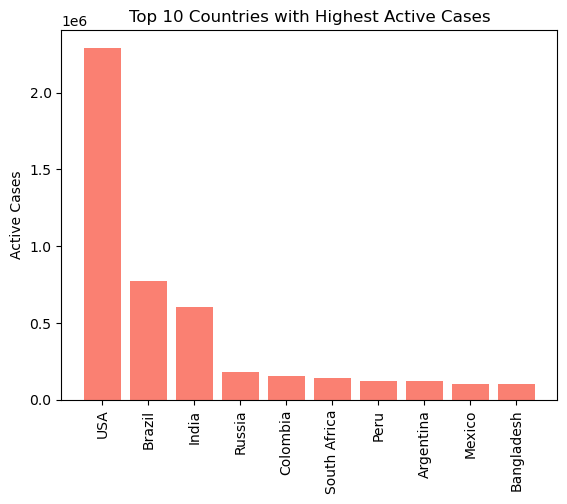

In [13]:
top_10_highest_active_cases = country_df.sort_values(by="ActiveCases", ascending=False).head(10)

display(top_10_highest_active_cases[['Country/Region', 'ActiveCases']])

plt.bar(top_10_highest_active_cases["Country/Region"], top_10_highest_active_cases["ActiveCases"], color='salmon')
plt.title("Top 10 Countries with Highest Active Cases")
plt.ylabel("Active Cases")
plt.xticks(rotation=90);

From the above bar charts, we can observe the following:

- Countries with the `highest total deaths` include the *USA* (**160,000+** deaths) and *Brazil* (**100,000** deaths), followed by *Mexico* and the *UK* with around **45,000-50,000** deaths. This highlights regions where the pandemic has caused the most significant loss of life.

- In terms of **highest total recovered cases**, the *USA* leads with over **2.5 million** recoveries, followed by *Brazil* (**2 million**) and *India* (**1.4 million**). These figures demonstrate successful recovery efforts in countries heavily impacted by the virus.

- The **highest active cases** chart, the *USA* has the highest number of active cases, significantly outpacing other countries with over 2.2 million active cases, which is almost three times more than the second-highest, *Brazil*. Following after *USA* are *Brazil* and *India* - the two high population countries.  The reflections suggest that whether the geographical concentration of active cases are North America, South America, South Asia, and parts of Europe?

- Overall, the charts reveal that countries like the *USA*, *Brazil*, and *India* faced severe pandemic consequences in terms of fatalities and case load but also achieved notable recovery numbers. Conversely, inconsistencies in active case data warrant further investigation.

<a id="analysis"></a>
## **Analysis**

<a id="q1"></a>
### **Question 1.** Does the global trend over time for Confirmed/Deaths/Recovered cases evolve over time?
- Answer this question indicates the trend of the number of confirmed, deaths, and recovered cases over time: when it peaks, when it decreases, and when it increases in the time series.
- To answer this question, we will:
    - Group `clean_complete_data` by `Date` and sum the values of `Confirmed`, `Deaths`, and `Recovered` columns. Then, we will plot the global trend over time for confirmed, deaths, and recovered cases using line charts.
    - Identify the peak dates for `Confirmed`, `Deaths`, and `Recovered` cases. Compute daily growth rates for key metrics.
    - Calculate and analyze the CFR as a percentage (Deaths / Confirmed * 100). Plot CFR trends over time.
    - Group data by `WHO Region` and `Date` and plot regional trends for Confirmed cases, comparing all regions on a single chart. Then provide insights on peaks, significant increases/decreases, and differences across WHO regions.

In [14]:
# Find total confirmed/deaths/recovered/acive cases per day
total_per_day = covid_19_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
total_per_day.to_csv(r"cleaned_data/total_per_day.csv", index=False)
total_per_day['Date'] = pd.to_datetime(total_per_day['Date'])
total_per_day.sample(5)

,Date,Confirmed,Deaths,Recovered,Active
36,2020-02-27,82034,2810,31919,47305
169,2020-07-09,12273063,554831,6665237,5052995
21,2020-02-12,46561,1118,4849,40594
131,2020-06-01,6280725,376674,2639599,3264452
12,2020-02-03,19887,426,604,18857


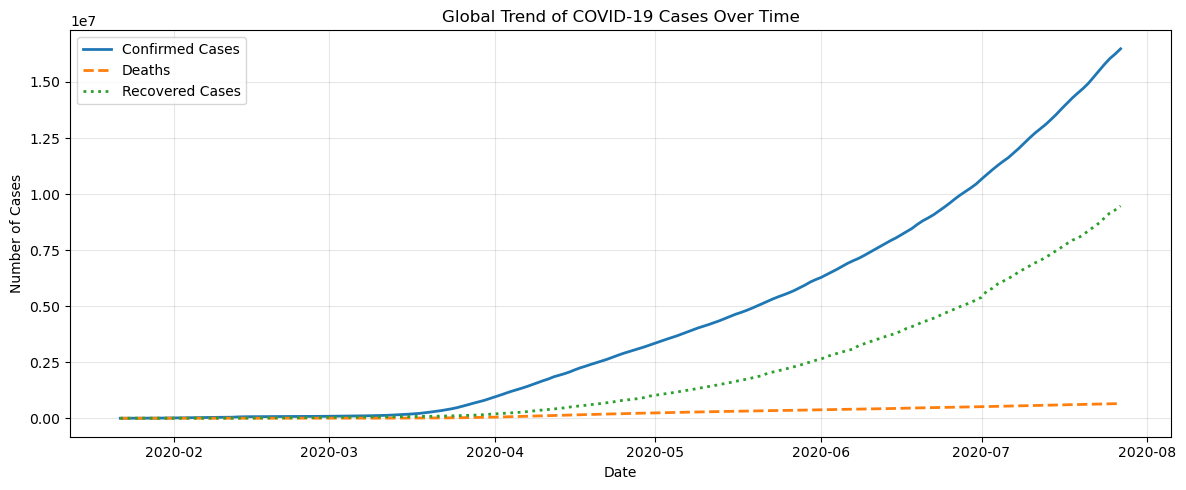

In [15]:
# Plotting the trends for Confirmed, Deaths, and Recovered cases
plt.figure(figsize=(12, 5))

# Confirmed cases
plt.plot(total_per_day['Date'], total_per_day['Confirmed'], label='Confirmed Cases', linewidth=2)

# Deaths
plt.plot(total_per_day['Date'], total_per_day['Deaths'], label='Deaths', linewidth=2, linestyle='--')

# Recovered cases
plt.plot(total_per_day['Date'], total_per_day['Recovered'], label='Recovered Cases', linewidth=2, linestyle=':')

plt.title('Global Trend of COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())    # Show ticks for each month
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- **_Confirmed Cases (Blue Line)_**: grows exponentially, indicating rapid global transmission. The step increase becomes more prominent after April 2020, reflecting the spread of COVID-19 to new regions and improved testing capabilities.
- **_Deaths (Orange Dashed Line)_**: hows a linear increase, significantly slower compared to Confirmed cases. This trend highlights the progress in medical treatments, healthcare management, and possibly reduced mortality rates relative to infections.
- **_Recovered Cases (Green Dotted Line)_**: initially lags behind Confirmed cases but shows a steeper rise starting from April 2020. Although the number of confirmed cases and recoveries continues to increase, the gap is not too large as a result of more stable disease control efforts globally.

In [16]:
# Find peak dates for each metric
peak_confirmed_date = total_per_day.loc[total_per_day['Confirmed'].idxmax(), 'Date'].date()
peak_deaths_date = total_per_day.loc[total_per_day['Deaths'].idxmax(), 'Date'].date()
peak_recovered_date = total_per_day.loc[total_per_day['Recovered'].idxmax(), 'Date'].date()

# Print the results
print("Peak Confirmed Cases Date:", peak_confirmed_date)
print("Peak Deaths Date:", peak_deaths_date)
print("Peak Recovered Cases Date:", peak_recovered_date)

# Calculate daily growth rate (percentage change)
total_per_day['Confirmed_Growth'] = total_per_day['Confirmed'].pct_change() * 100
total_per_day['Deaths_Growth'] = total_per_day['Deaths'].pct_change() * 100
total_per_day['Recovered_Growth'] = total_per_day['Recovered'].pct_change() * 100

total_per_day[['Confirmed_Growth', 'Deaths_Growth', 'Recovered_Growth']].head(5)

Peak Confirmed Cases Date: 2020-07-27
Peak Deaths Date: 2020-07-27
Peak Recovered Cases Date: 2020-07-27


,Confirmed_Growth,Deaths_Growth,Recovered_Growth
0,NaN,NaN,NaN
1,17.837838,5.882353,7.142857
2,43.883792,44.444444,20.000000
3,52.391073,61.538462,8.333333
4,47.698745,33.333333,33.333333


- All three metrics (Confirmed, Deaths, and Recovered) peaked on the same date, indicating a critical global moment in the pandemic timeline.
- The growth rates are high in the early days, reflecting the rapid initial spread and the slower rate of increase as the pandemic progressed.

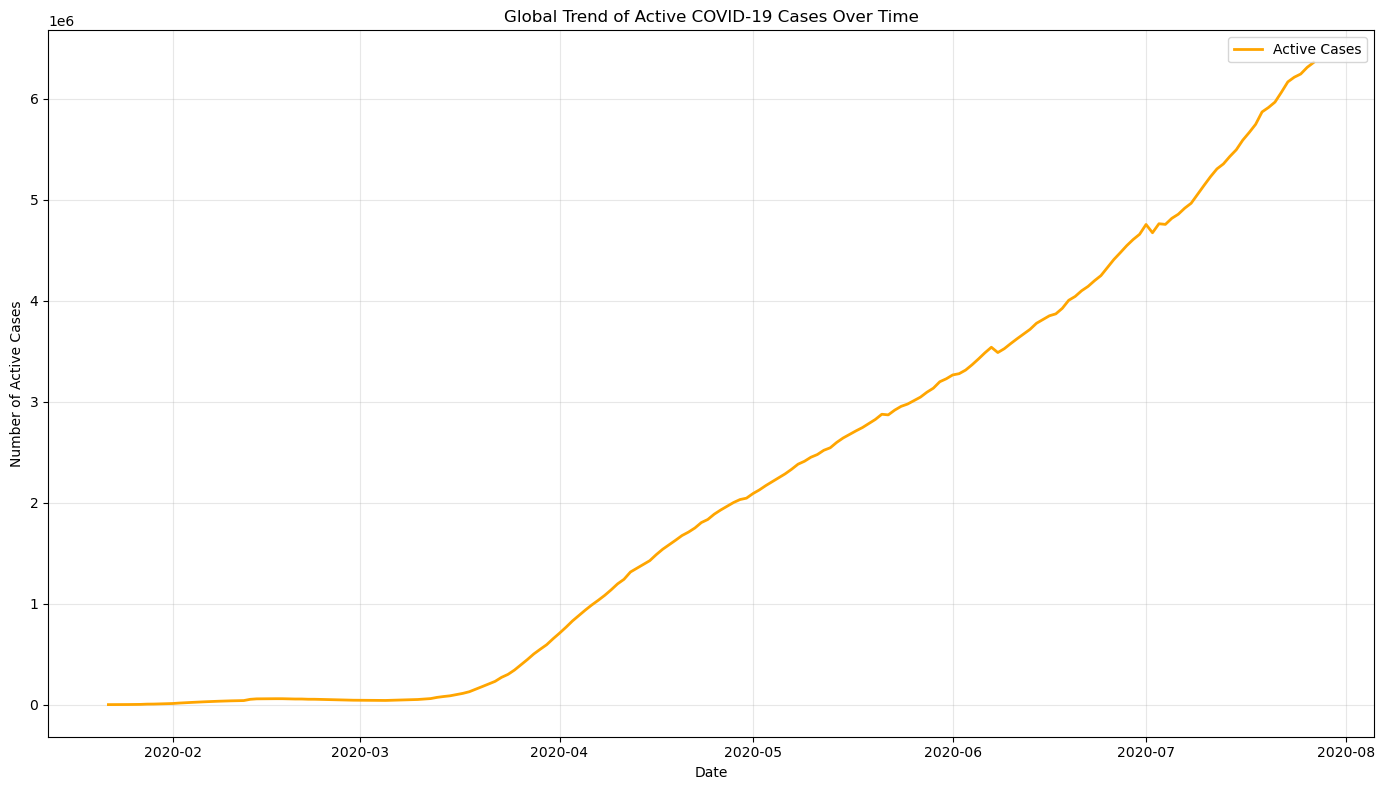

In [17]:
# Plot Active Cases separately
plt.figure(figsize=(14, 8))

plt.plot(total_per_day['Date'], total_per_day['Active'], label='Active Cases', color='orange', linewidth=2)

# Customize the plot
plt.title('Global Trend of Active COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Active Cases')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())    # Show ticks for each month
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- From February to March 2020, active cases increase slowly, indicating the early stages of the pandemic where infections were limited to certain regions.
- Starting in late March, the number of active cases begins to rise rapidly, reflecting the global spread of the pandemic. The trend shows sustained growth, likely due to the surge in infections outpacing recoveries and deaths during this period. 
- By July, the growth rate starts to slow slightly, indicating a potential stabilization in active cases, possibly due to improved healthcare management or pandemic interventions like lockdowns.

- The steep rise in active cases highlights the immense pressure on healthcare systems during the pandemic's peak period (April–July 2020). Active cases represent patients requiring isolation, treatment, or monitoring, making this metric a critical indicator of strain on resources.
- By July, growth rates, although slightly volatile throughout the process, showed signs of stabilizing in active cases, possibly due to improved healthcare management or pandemic interventions like lockdowns.

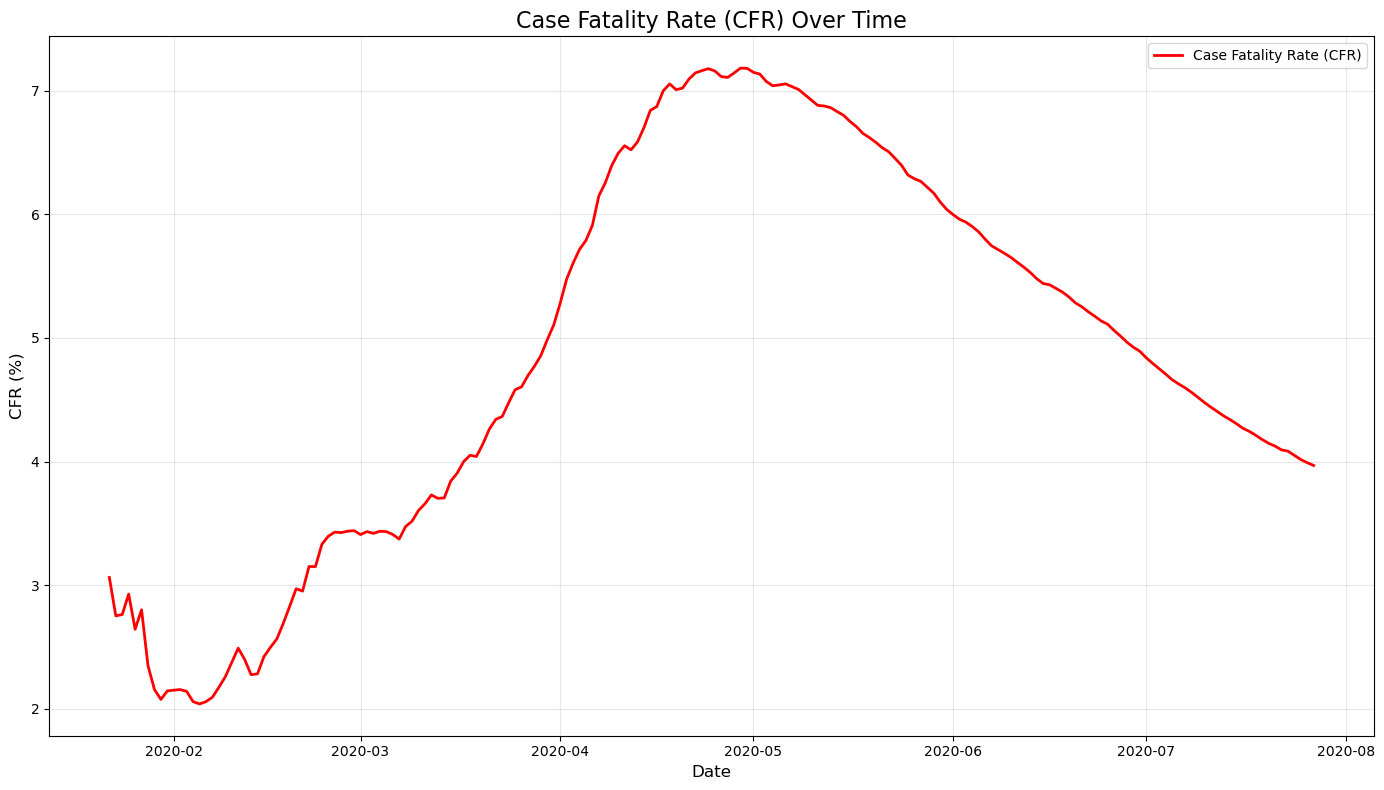

In [18]:
# Calculate CFR = Deaths / Confirmed
total_per_day['CFR'] = (total_per_day['Deaths'] / total_per_day['Confirmed']) * 100

# Plot CFR over time
plt.figure(figsize=(14, 8))

plt.plot(total_per_day['Date'], total_per_day['CFR'], label='Case Fatality Rate (CFR)', color='red', linewidth=2)
plt.title('Case Fatality Rate (CFR) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CFR (%)', fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())    # Show ticks for each month
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- The CFR starts above 3% and drops sharply to around 2% in early February. This decline may reflect the initial containment of severe cases and improved treatments during the early stages of the pandemic.
- CFR steadily rises, peaking at approximately 7% in mid-April. This period aligns with the first major global wave of the pandemic, where healthcare systems in several countries became overwhelmed, leading to higher fatality rates.
- After peaking in April, the CFR begins a steady decline, dropping below 5% by June and approaching 3% by the end of July. This is likely due to the better understanding of the disease. Improved treatment protocols and expanded testing, leading to the identification of milder cases (which lowers the fatality rate), are measures taken to reduce this rate.

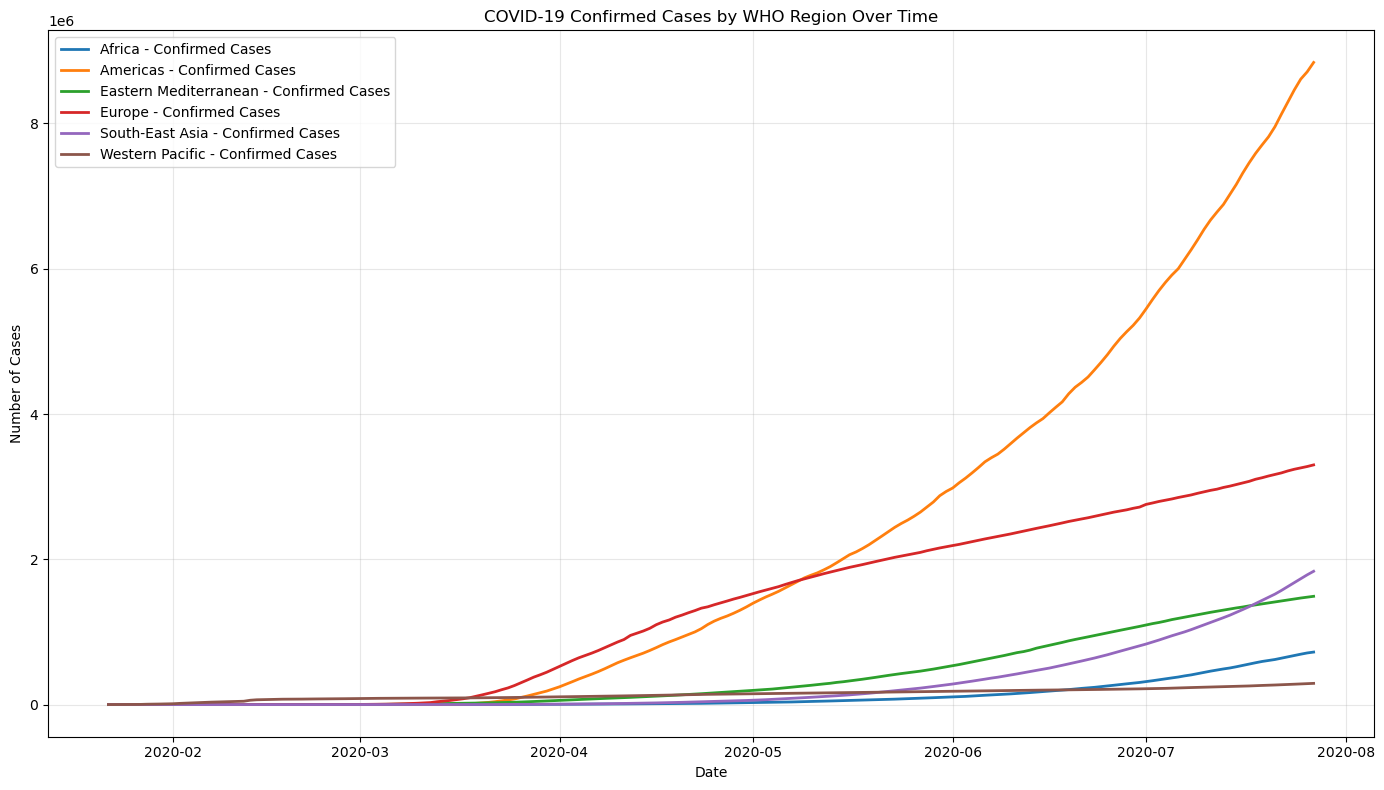

In [42]:
# Group by WHO Region and Date, summing up cases
regional_trends = covid_19_df.groupby(['WHO Region', 'Date'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Plot Confirmed cases for all WHO Regions
plt.figure(figsize=(14, 8))

# Loop through each WHO Region and plot its trend
regions = regional_trends['WHO Region'].unique()
for region in regions:
    region_data = regional_trends[regional_trends['WHO Region'] == region]
    # Convert to month-year format for better readability
    region_data.loc[:, 'Date'] = pd.to_datetime(region_data['Date'])
    plt.plot(region_data['Date'], region_data['Confirmed'], label=f'{region} - Confirmed Cases', linewidth=2)

# Customize the chart
plt.title('COVID-19 Confirmed Cases by WHO Region Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- The Americas experienced the highest number of confirmed cases, with a rapid and steep increase surpassing 8 million by the end of the observed period.
- Europe had an early rise in cases, reflecting the initial wave of the pandemic.
- South-East Asia showed steady growth, catching up later as the pandemic spread.
- These regions, namely Africa and Western Pacific, had slower growth in confirmed cases, potentially due to effective containment measures or lower testing/reporting capacities.
- Moderate growth was observed in this region, falling between trends seen in South-East Asia and Africa.
- Variations in case trends reflect differences in population density, healthcare capacity, interventions, and testing/reporting systems across regions.

The global trends for confirmed, deaths, and recovered COVID-19 cases evolved significantly over time, peaking on July 27, 2020. Exponential growth marked confirmed cases. Deaths increased linearly at a slower rate. Improved healthcare interventions initially caused a meaningful lag in recovered cases, but later led to a large surge. Better treatment protocols, along with expanded healthcare capacities, were reflected in a decline of the case fatality rate (CFR) to below 4% by July 2020, from a peak of approximately 7% in April 2020. The importance of readily available healthcare resources and promptly implemented interventions in effectively managing the pandemic was importantly highlighted by the extremely steep growth experienced in the Americas, among greatly varied regional trends.

<a id="q6"></a>
### **Question 2.** How the world respond to the COVID-19 pandemic?
- Answer this question indicates the response of the wolrd separated by continents to the COVID-19 pandemic in different aspects: how pandemic hit these countries, effectiveness of epidemic control by testing and the recovery rate.
- To answer this question, first, we will extract and summarize the relevant data for each continent in the world. To analyze how the pandemic hit them, we will plot the rate of "Death", "Serious,Critical" and "Recovered" cases by 1M population in these continents. To analyze the effectiveness of epidemic control by testing, we will plot the rate of "Tests/1M pop" in these continents.

First, we will check the continents status of the COVID-19 pandemic by plotting the rate of "Death", "Serious,Critical" and "Recovered" cases by 1M population in these continents.

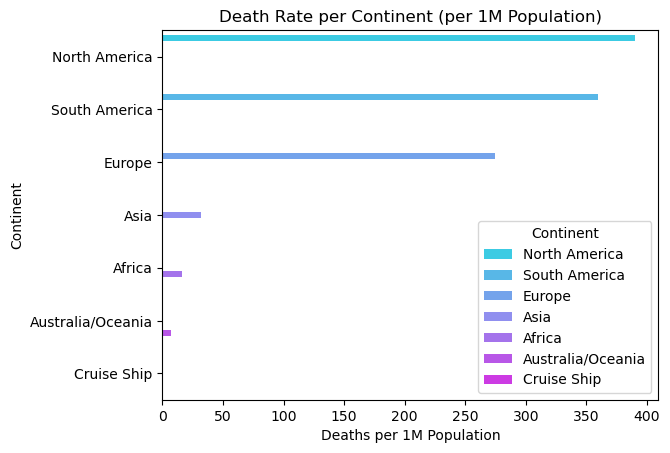

,Continent,TotalDeaths,Population,Deaths_per_1M
0,North America,229855.0,5.895035e+08,389.912889
1,South America,154885.0,4.311105e+08,359.269869
2,Europe,205232.0,7.476775e+08,274.492662
3,Asia,100627.0,3.173656e+09,31.706961
4,Africa,22114.0,1.343515e+09,16.459803
5,Australia/Oceania,281.0,4.095791e+07,6.860702
6,Cruise Ship,13.0,0.000000e+00,0.000000


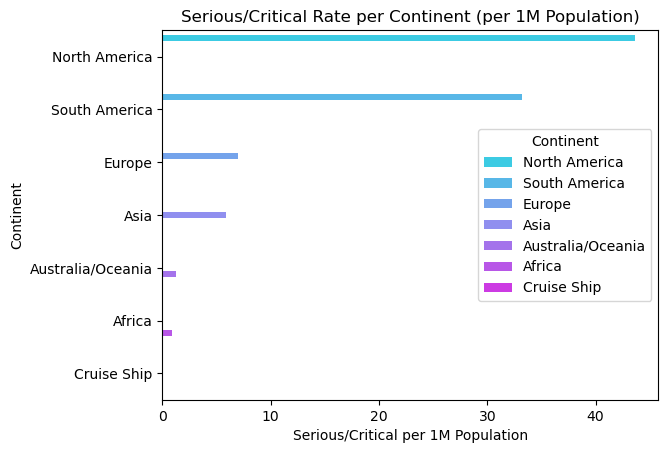

,Continent,"Serious,Critical",Population,Serious_per_1M
0,North America,25709.0,5.895035e+08,43.611279
1,South America,14295.0,4.311105e+08,33.158555
2,Europe,5200.0,7.476775e+08,6.954870
3,Asia,18749.0,3.173656e+09,5.907697
4,Australia/Oceania,52.0,4.095791e+07,1.269596
5,Africa,1187.0,1.343515e+09,0.883503
6,Cruise Ship,4.0,0.000000e+00,0.000000


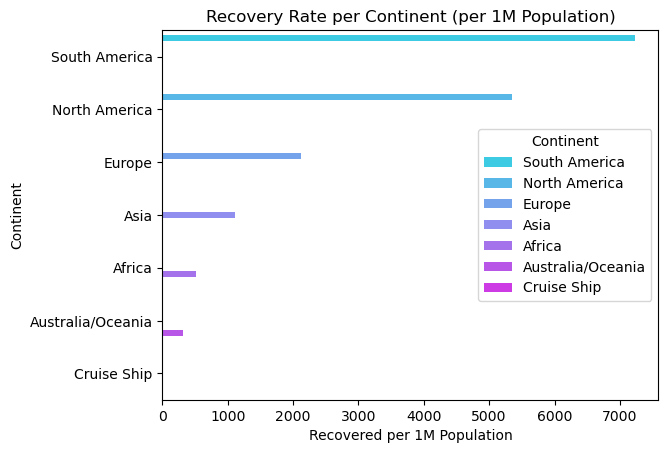

,Continent,TotalRecovered,Population,Recovered_per_1M
0,South America,3116150.0,4.311105e+08,7228.193839
1,North America,3151678.0,5.895035e+08,5346.326487
2,Europe,1587302.0,7.476775e+08,2122.976688
3,Asia,3508170.0,3.173656e+09,1105.403214
4,Africa,693620.0,1.343515e+09,516.272425
5,Australia/Oceania,12620.0,4.095791e+07,308.121198
6,Cruise Ship,651.0,0.000000e+00,0.000000


In [20]:
# Group by continent and find sum of population, total deaths, total recovered, serious, critical case
continent_stat = country_df.groupby('Continent')[['Population', 'TotalDeaths', 'Serious,Critical', 'TotalRecovered']].sum().reset_index()

# Calculate death rate and serious/critical rate per 1M population for each continent
continent_stat['Deaths_per_1M'] = continent_stat['TotalDeaths'] / continent_stat['Population'] * 1000000
continent_stat['Serious_per_1M'] = continent_stat['Serious,Critical'] / continent_stat['Population'] * 1000000
continent_stat['Recovered_per_1M'] = continent_stat['TotalRecovered'] / continent_stat['Population'] * 1000000

# Handle the case in `Cruse Ship`
continent_stat.loc[continent_stat['Continent'] == 'Cruise Ship', 'Deaths_per_1M'] = 0
continent_stat.loc[continent_stat['Continent'] == 'Cruise Ship', 'Serious_per_1M'] = 0
continent_stat.loc[continent_stat['Continent'] == 'Cruise Ship', 'Recovered_per_1M'] = 0

# Sort the data by death rate, serious/critical rate and recover rate
continent_stat_deaths = continent_stat.sort_values('Deaths_per_1M', ascending=False).reset_index(drop=True)
continent_stat_serious = continent_stat.sort_values('Serious_per_1M', ascending=False).reset_index(drop=True)
continent_stat_recovered = continent_stat.sort_values('Recovered_per_1M', ascending=False).reset_index(drop=True)

# Plot 1: Death rate per continent (per 1M population)
sns.barplot(x='Deaths_per_1M', y='Continent', data=continent_stat_deaths, palette='cool', hue='Continent')
plt.title('Death Rate per Continent (per 1M Population)')
plt.xlabel('Deaths per 1M Population')
plt.ylabel('Continent')
plt.show()
display(continent_stat_deaths[['Continent', 'TotalDeaths', 'Population', 'Deaths_per_1M']])

# Plot 2: Serious/Critical rate per continent (per 1M population)
sns.barplot(x='Serious_per_1M', y='Continent', data=continent_stat_serious, palette='cool', hue='Continent')
plt.title('Serious/Critical Rate per Continent (per 1M Population)')
plt.xlabel('Serious/Critical per 1M Population')
plt.ylabel('Continent')
plt.show()
display(continent_stat_serious[['Continent', 'Serious,Critical', 'Population', 'Serious_per_1M']])

# Plot 3: Recovery rate per continent (per 1M population)
sns.barplot(x='Recovered_per_1M', y='Continent', data=continent_stat_recovered, palette='cool', hue='Continent')
plt.title('Recovery Rate per Continent (per 1M Population)')
plt.xlabel('Recovered per 1M Population')
plt.ylabel('Continent')
plt.show()
display(continent_stat_recovered[['Continent', 'TotalRecovered', 'Population', 'Recovered_per_1M']])

**Insights:**
- For the rate of`Death` cases by 1M population, North America has the highest Deaths per 1M population at 389.91, followed closely by South America at 359.27. In contrast, Asia shows significantly lower mortality rates at 31.71. This disparity highlights regional differences in healthcare capacity and response effectiveness during the pandemic.
- For the rate of`Serious,Critical` cases by 1M population, North America also reports the highest total of Serious/Critical cases at 25,709, followed by South America with 14,295. However, the relatively low serious cases in Asia (18,749) compared to its large population suggests that many infections were asymptomatic or mild, possibly due to effective early interventions.
- For the rate of`Recovered` cases by 1M population, South America and North America both report high recovery totals, with `TotalRecovered` figures of 3,116,150 and 3,151,678 respectively, indicating that despite high case numbers, many individuals successfully recovered from the virus across these regions. Asia also has a high recovery rate with 3,508,170, showing effective management of cases.

Testing for COVID-19 is crucial in controlling the pandemic as it helps identify and isolate infected individuals, thereby preventing further transmission. By detecting cases early, health authorities can implement targeted interventions and manage outbreaks more effectively. A high testing rate reflects a country’s commitment to monitoring the virus's spread, enabling timely data collection to inform public health strategies. Ultimately, increased testing is an active measure that empowers governments and communities to make informed decisions, assess the effectiveness of control measures, and adapt their responses based on real-time information about the pandemic's status.

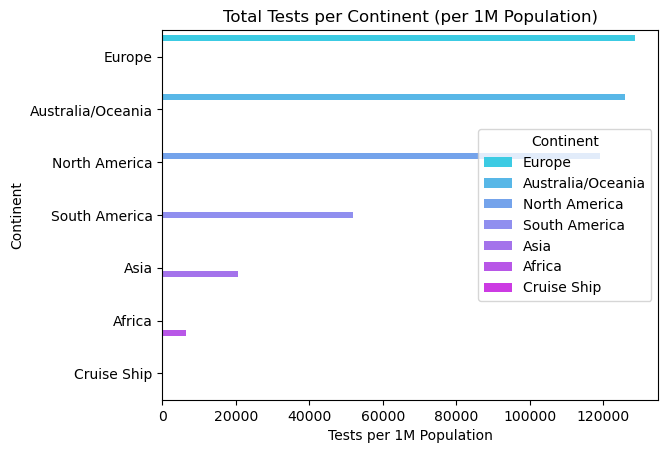

,Continent,TotalTests,Population,Tests/1M pop
0,Europe,96125611.0,7.476775e+08,128565.598251
1,Australia/Oceania,5152811.0,4.095791e+07,125807.472252
2,North America,70173584.0,5.895035e+08,119038.458513
3,South America,22379618.0,4.311105e+08,51911.562972
4,Asia,65353821.0,3.173656e+09,20592.594930
5,Africa,8673853.0,1.343515e+09,6456.087087
6,Cruise Ship,0.0,0.000000e+00,NaN


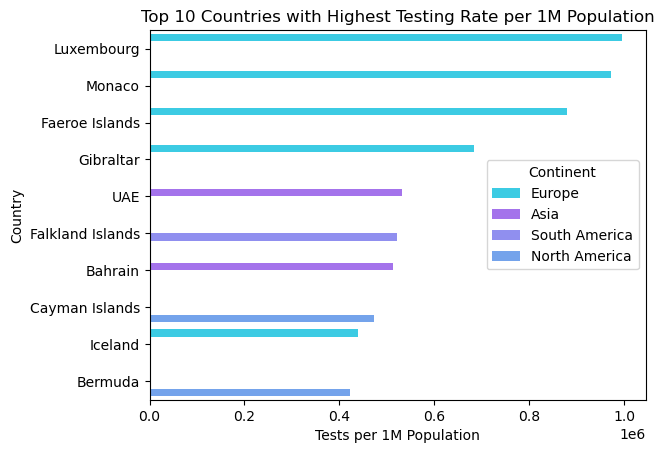

,Country/Region,Continent,Population,TotalTests,Tests/1M pop
0,Luxembourg,Europe,626952.0,623994.0,995282.0
1,Monaco,Europe,39270.0,38209.0,972982.0
2,Faeroe Islands,Europe,48882.0,43045.0,880590.0
3,Gibraltar,Europe,33690.0,23063.0,684565.0
4,UAE,Asia,9902079.0,5262658.0,531470.0
5,Falkland Islands,South America,3489.0,1816.0,520493.0
6,Bahrain,Asia,1706669.0,876700.0,513691.0
7,Cayman Islands,North America,65798.0,31108.0,472780.0
8,Iceland,Europe,341465.0,149693.0,438385.0
9,Bermuda,North America,62254.0,26352.0,423298.0


In [21]:
# Get top 10 countries with the highest testing rate per 1M population
top_10_testing_rate = country_df.nlargest(10, 'Tests/1M pop').reset_index(drop=True)

# Calculate total tests and total population for each continent
continent_summary = country_df.groupby('Continent')[['Population', 'TotalTests']].sum().reset_index()

# Calculate testing rate per 1M population for each continent
continent_summary['Tests/1M pop'] = continent_summary['TotalTests'] / continent_summary['Population'] * 1000000

# Sort the data by testing rate
continent_summary = continent_summary.sort_values('Tests/1M pop', ascending=False).reset_index(drop=True)

# Define a fixed palette for continents
palette = sns.color_palette("cool", len(continent_summary['Continent'].unique()))
continent_palette = dict(zip(continent_summary['Continent'].unique(), palette))

# Plot 1: Top 10 countries with the highest testing rate per 1M population
sns.barplot(x='Tests/1M pop', y='Continent', data=continent_summary, palette=continent_palette, hue='Continent')
plt.title('Total Tests per Continent (per 1M Population)')
plt.xlabel('Tests per 1M Population')
plt.ylabel('Continent')
plt.show()
display(continent_summary[['Continent', 'TotalTests', 'Population', 'Tests/1M pop']])

# Plot 2: Total tests per continent (per 1M population)
sns.barplot(x='Tests/1M pop', y='Country/Region', hue='Continent', data=top_10_testing_rate, palette=continent_palette)
plt.title('Top 10 Countries with Highest Testing Rate per 1M Population')
plt.xlabel('Tests per 1M Population')
plt.ylabel('Country')
plt.show()
display(top_10_testing_rate[['Country/Region', 'Continent', 'Population', 'TotalTests', 'Tests/1M pop']])

**Insights:**   
- The rate of `Total Tests` per 1M population in the continents is quite low, which means that the testing capacity in these continents is not enough to control the pandemic effectively. The maximum testing rate across continents is around 120,000 tests per 1M population, suggesting that many regions still struggle with sufficient testing infrastructure.
- The rate of `Tests/1M pop` in each country in the continents is uneven reveals significant disparities in testing capacity. Some countries have implemented extensive testing policies, while others lag far behind, reflecting varied national strategies in response to the pandemic.
- The highest testing rate is in Europe, followed by Australia/Oceania, North America, South America, Asia, and Africa. 
- There is an supprising view that despite being the first region to report COVID-19 cases, Asia has lower overall testing rates than regions like Europe and North America. This could indicate successful early measures taken by some Asian countries, allowing them to manage infections without extensive testing early on.

The COVID-19 pandemic has revealed critical global disparities in mortality rates, recovery rates, and testing capacities. The most hit regions by the spread of the virus is Europe, where has the highest total cases and testing rates. But fortunately, the recovery rate in Europe is also high, just after Asia, this leads to the low mortality rate in this region compared to North America and South America, which have very high serious cases and death rates. While North America and South America face higher mortality rates amidst their serious cases, Asia's ability to achieve high recovery rates with lower mortality rates highlights effective public health responses in some regions. However, the overall low testing rates across continents limit the ability to control the virus effectively, emphasizing the need for improved healthcare infrastructure and testing strategies globally. The mixed experiences underscore the importance of timely interventions, strong healthcare systems, and comprehensive testing in managing a pandemic effectively. 

<a id="q6"></a>
### **Question 3.** How do countries worldwide differ in situation testing, reporting and updating during the COVID-19 pandemic?

- Answering this question provides insights into how countries around the world vary in their approaches to testing for COVID-19, reporting confirmed cases, and updating pandemic data. Understanding these differences is crucial for evaluating the effectiveness of global and national pandemic responses and improving data-sharing mechanisms for future outbreaks.

- To answer this question:
  - We will analyze country-level data to examine the relationship between testing efforts (`Tests/1M pop`) and confirmed cases (`Tot Cases/1M pop`) in the `country_df` dataset. A log-log scatter plot will visualize how countries differ in their testing and case reporting patterns, highlighting outliers with exceptionally high or low test-to-case ratios.
  - To explore temporal trends, we will focus on countries with extreme test-to-case ratios (e.g., above 1000:1 or below 0.1:1). A line chart will show how confirmed cases evolved over time in these countries. 
  - The frequency of pandemic updates (number of days with reports) for each country will be calculated grouping by `Country/Region` using the `covid_19_df` dataset. A choropleth map will illustrate global disparities in reporting frequency.  

Initially, we start by visualizing the relationship between total tests and total cases per million population using a log-log scatter plot. Diagonal lines represent specific test-to-case ratios, highlighting countries with exceptionally high or low values.

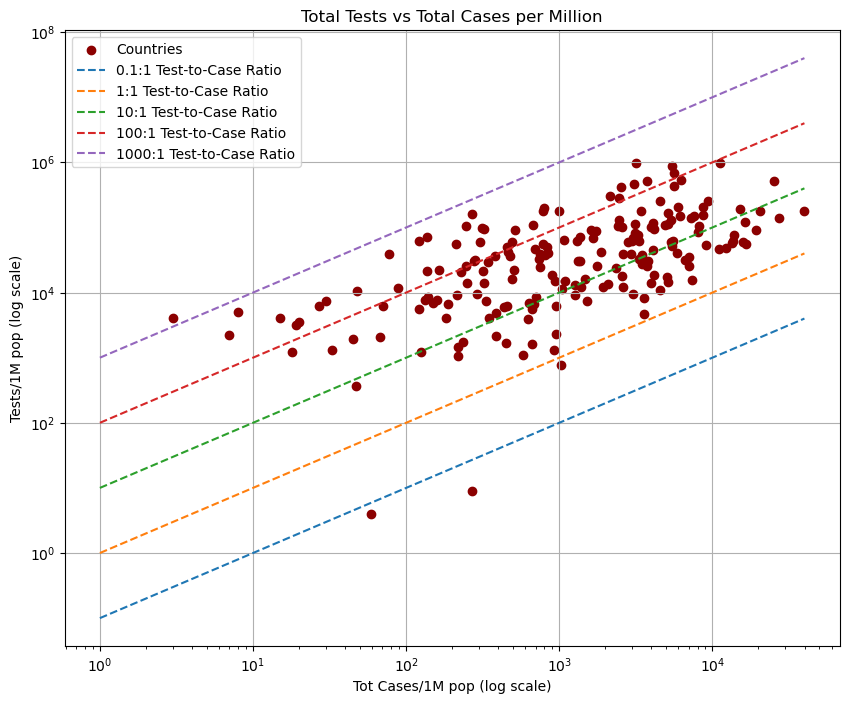

In [22]:
# Plot scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(country_df['Tot Cases/1M pop'], country_df['Tests/1M pop'], c='darkred', label='Countries')
    
# Draw diagonal lines (test-to-case ratios)
ratios = [0.1, 1, 10, 100, 1000]
x = np.linspace(1, country_df['Tot Cases/1M pop'].max(), 100)
for ratio in ratios:
    plt.plot(x, x * ratio, linestyle='--', label=f'{ratio}:1 Test-to-Case Ratio')

# Configure chart
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tot Cases/1M pop (log scale)')
plt.ylabel('Tests/1M pop (log scale)')
plt.title('Total Tests vs Total Cases per Million')
plt.grid()
plt.legend();

From the scatter plot, the following observations can be made:

- Most countries are concentrated around the **10:1 and 100:1 test-to-case ratios**, indicating that they conducted sufficient testing to detect confirmed cases while maintaining reasonable testing efficiency. This reflects balanced testing practices.
- Countries with test-to-case ratios between **1:1 and 10:1** show relatively high positive rates, which could suggest a lack of widespread sampling efforts. These countries may have focused on testing symptomatic cases or specific groups, potentially overlooking asymptomatic carriers.
- A few countries exhibit extremely high test-to-case ratios (above **1000:1**) or very low test-to-case ratios (below **0.1:1**). Countries with high ratios may have conducted excessive testing compared to the number of confirmed cases, potentially indicating strong control over the pandemic or over-testing in less affected regions. Conversely, countries with low ratios may reflect inadequate testing capacity or significant underreporting of cases.

To understand the reasons behind these abnormal test-to-case ratios, we will analyze the temporal trends of confirmed cases in these countries using a line chart. First, we need to identify which countries that have abnormal values.

In [23]:
# Calculate test-to-case ratio
country_df['Ratio'] = country_df['Tests/1M pop'] / country_df['Tot Cases/1M pop']

# Filter abnormal countries 
abnormal_countries = country_df[(country_df['Ratio'] > 1000) | ((country_df['Ratio'] < 1) & (country_df['Ratio'] > 0))]
abnormal_countries[['Country/Region', 'Tot Cases/1M pop', 'Tests/1M pop', 'Ratio']]

,Country/Region,Tot Cases/1M pop,Tests/1M pop,Ratio
78,Sudan,268.0,9.0,0.033582
127,Guinea-Bissau,1030.0,761.0,0.738835
131,Yemen,59.0,4.0,0.067797
200,Laos,3.0,4032.0,1344.000000


Then, we plot the temporal trends of confirmed cases in the identified countries using line chart.

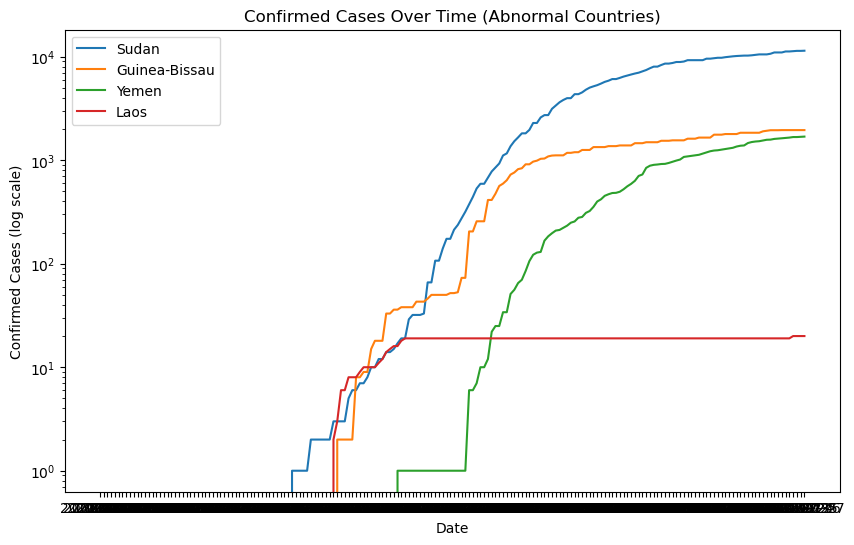

In [24]:
# Plot line chart
plt.figure(figsize=(10, 6))

for country in abnormal_countries['Country/Region']:
    country_data = covid_19_df[covid_19_df['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

# Configure chart
plt.yscale('log')
plt.title('Confirmed Cases Over Time (Abnormal Countries)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (log scale)')
plt.legend();

From the line plot, we observe diverse trends in the evolution of confirmed cases among the identified countries with abnormal test-to-case ratios. For example:
- **Sudan** and **Guinea-Bissau** show steady increases over time, indicating continuous spread and testing efforts.
- **Yemen** exhibits delayed initial reporting, followed by a sharp increase, possibly reflecting limited testing capacity or late acknowledgment of outbreaks.
- **Laos** displays a flat trend, suggesting very few reported cases, likely due to effective containment, underreporting, or insufficient testing.

Therefore, after examining the aspects of testing and reporting, it is equally important to assess the updating practices of countries worldwide regarding pandemic data. To start, we calculate the update frequency by grouping the dataset by country and counting the number of records for each country:

In [25]:
# Group by country and count the number of rows for each country
update_frequency = covid_19_df.groupby('Country/Region').size().reset_index(name='Update Frequency')

We continue by visualizing the update frequency of COVID-19 data across countries using a choropleth map. The geographical data is read from a shapefile and merged with the calculated update frequency for each country.

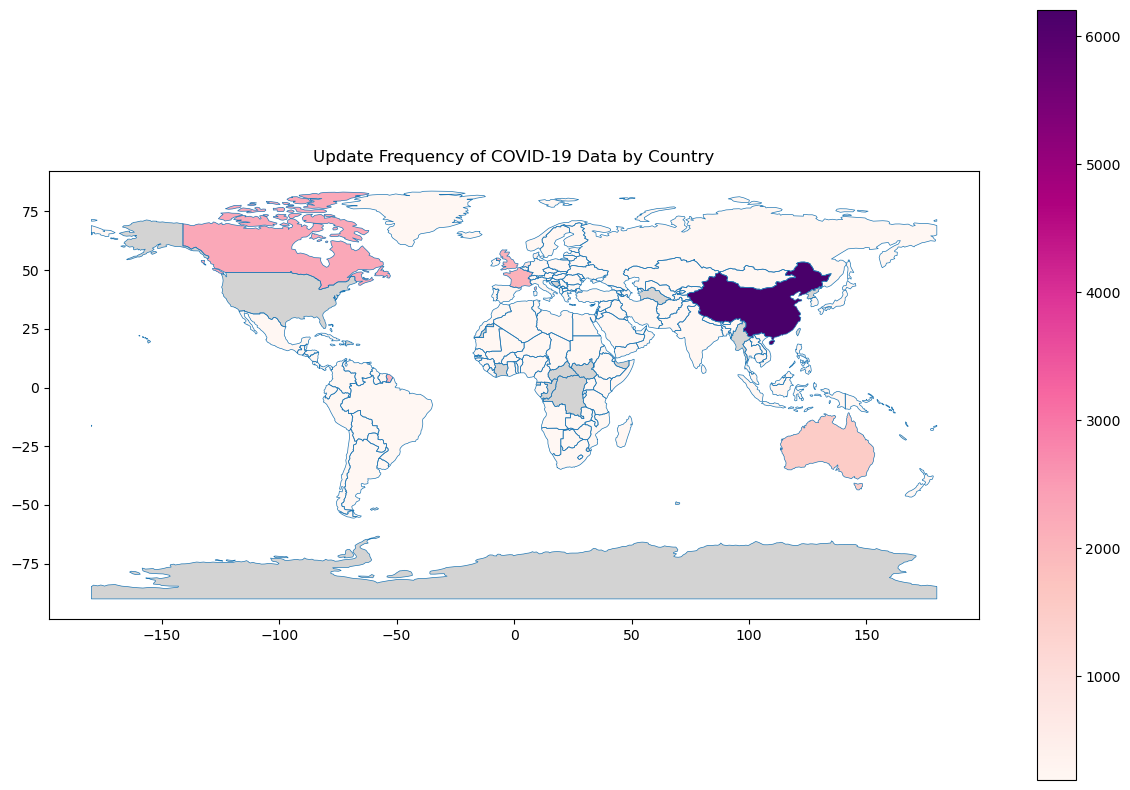

In [26]:
# Read geographical data from the shapefile
shapefile_path = "./geo_data/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

# Merge update frequency data with geographical data
world = world.merge(update_frequency, left_on='NAME', right_on='Country/Region', how='left')

# Plot the map showing update frequency
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.5)
world.plot(column='Update Frequency', ax=ax, legend=True, cmap='RdPu', 
           missing_kwds={"color": "lightgrey", "label": "No data"})
plt.title("Update Frequency of COVID-19 Data by Country");

The choropleth map illustrates the update frequency of COVID-19 data across countries, which can be observed that:

- **High-frequency updates:** Countries like China and the United States show the highest number of updates, reflecting consistent monitoring and reporting of pandemic data.
- **Moderate updates:** Many countries in Europe, North America, and Australia exhibit moderate update frequencies, indicating regular but less frequent reporting practices.
- **Low or no updates:** Regions in Africa and parts of South America appear with minimal updates or missing data, suggesting challenges in data collection or reporting infrastructure.

This visualization highlights disparities in pandemic data reporting practices across the globe. Countries with higher update frequencies demonstrate better transparency and responsiveness, while regions with lower frequencies may face systemic challenges or lack resources to track and report cases effectively.

## **References**
<a id="references"></a>
- Covid-19 knowledge and information: https://www.who.int/emergencies/diseases/novel-coronavirus-2019
- Worldometer data details: https://www.worldometers.info/coronavirus/
- Surprising facts about COVID-19: https://www.veritasint.com/news/genetics-covid/